<a href="https://colab.research.google.com/github/seifedinhayredin/Chatbot/blob/main/Malaria_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
dataset,dataset_info = tfds.load("malaria",with_info = True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,InputLayer,Flatten,Layer

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmp1pkk4lkstfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
TRAIN_DATASET = 0.8*len(dataset)
VAL_DATASET = 0.2*len(dataset)

train_dataset = dataset.take(TRAIN_DATASET)
val_dataset = dataset.skip(TRAIN_DATASET)

1


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  #datasets = tf.data.Dataset.range(10)
  DATASET_SIZE =  len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))


  to_val_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = to_val_dataset.take(int(VAL_RATIO*DATASET_SIZE))


  test_dataset = to_val_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
#print(list(train_dataset.take(1).as_numpy_iterator()))
#print(list(val_dataset.take(1).as_numpy_iterator()))
#print(list(test_dataset.take(1).as_numpy_iterator()))

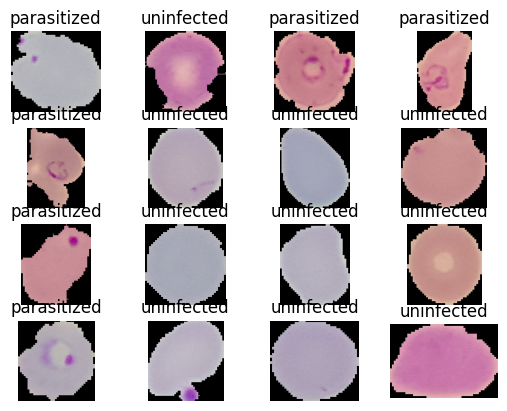

In [ ]:
for i , (image,label)in enumerate(test_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis("off")

In [ ]:
dataset_info.features['label'].int2str(0)

'parasitized'

In [ ]:
IM_SIZE = 224
def resizing_rescaling(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

In [ ]:
train_dataset = train_dataset.map(resizing_rescaling)
val_dataset  = val_dataset.map(resizing_rescaling)
test_dataset = test_dataset.map(resizing_rescaling)

In [ ]:
train_datset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for image,label in val_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [ ]:
train_datset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_datset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Model



In [ ]:
IM_SIZE = 224

In [ ]:
model_1 = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),
    Conv2D(filters = 6,kernel_size = 5, strides=1, padding = "valid", activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides=2),

    Conv2D(filters = 16,kernel_size = 5, strides=1, padding = "valid", activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides=2),

    Flatten(),
    Dense(100, activation = "relu"),
    BatchNormalization(),
    Dense(10, activation = "relu"),
    BatchNormalization(),
    Dense(1, activation = "sigmoid"),
])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_12 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_13 (Ba  (None, 106, 106, 16)      64        
 tchNormalization)                                               
                                                      

In [ ]:
model_1.compile(optimizer = Adam(learning_rate=0.01),
                loss = BinaryCrossentropy(),
                metrics = 'accuracy')

In [ ]:
train_dataset = train_dataset.batch(1)

In [ ]:
val_dataset = val_dataset

In [ ]:
val_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [ ]:
history = model_1.fit(train_dataset, validation_data=val_dataset,epochs = 20, verbose=1)

Epoch 1/20
22045/22046 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**Functional API Model creation**

In [ ]:
input_data = Input(shape = (IM_SIZE,IM_SIZE,3), name = "Input_image")
x = Conv2D(filters = 6, kernel_size = 5, padding = "valid", strides=1, activation = "relu")(input_data)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides= 2)(x)

x = Conv2D(filters = 16, kernel_size = 5, padding = "valid", strides=1, activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides= 2)(x)

x = Flatten()(x)

x = Dense(100, activation="relu")(x)
x = BatchNormalization()(x)
x = Dense(10, activation="relu")(x)
x = BatchNormalization()(x)
Output_mod = Dense(1, activation="sigmoid")(x)

Model_3 = Model(input_data,Output_mod, name = "Model_3")
Model_3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (Batch  (None, 220, 220, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Bat  (None, 106, 106, 16)      64  

In [ ]:
Model_3.compile(optimizer  = Adam(learning_rate=0.01),
                          loss = BinaryCrossentropy(),
                          metrics = "accuracy")


In [ ]:
history = Model_3.fit(train_dataset, validation_data = val_dataset,   batch_size=32, epochs = 10, verbose = 1)

Epoch 1/10
22042/22046 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4978

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "Model_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, None, 224, 224, 3)


Building a feauter extraction model and classification model differently

  **feauter extraction** part

In [ ]:
input_data = Input(shape = (IM_SIZE,IM_SIZE,3), name = "Input_image")

x = x = Conv2D(filters = 6, kernel_size = 5, padding = "valid", strides=1, activation = "relu")(input_data)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides= 2)(x)

x = Conv2D(filters = 16, kernel_size = 5, padding = "valid", strides=1, activation = "relu")(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size = 2, strides= 2)(x)

Feauter_extractor_model = Model(input_data,output, name = "Feauter_extractor_model")
Feauter_extractor_model.summary()

Model: "Feauter_extractor_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_4 (Bat  (None, 220, 220, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_5 (Bat  (None, 106, 10

Classification Part

In [ ]:
x = Feauter_extractor_model(input_data)
x = Flatten()(x)

x = Dense(100, activation="relu")(x)
x = BatchNormalization()(x)
x = Dense(10, activation="relu")(x)
x = BatchNormalization()(x)
Output_mod = Dense(1, activation="sigmoid")(x)

Model_4 = Model(input_data,Output_mod, name = "Model_4")
Model_4.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feauter_extractor_model (F  (None, 53, 53, 16)        2960      
 unctional)                                                      
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4494500   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010

Model Subclassing method of model creation

In [ ]:
class FeauterExtractor(Layer):
  def __init__(self, filters, kernel_size,strides, padding, activation,pool_size):
    super(FeauterExtractor, self).__init__()
    self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size = pool_size, strides = strides*2)

    self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding = padding, activation = activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size = pool_size, strides = strides*2)
  def call(self, x, training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

Feauter_Extractor_subclassed = FeauterExtractor(8, 3, 1, "valid", "relu",2)


In [ ]:
input_data = Input(shape = (IM_SIZE,IM_SIZE,3), name = "Input_image")

x = Feauter_Extractor_subclassed(input_data)
x = Flatten()(x)

x = Dense(100, activation="relu")(x)
x = BatchNormalization()(x)
x = Dense(10, activation="relu")(x)
x = BatchNormalization()(x)
Output_mod = Dense(1, activation="sigmoid")(x)

Model_5 = Model(input_data,Output_mod, name = "Model_5")
Model_5.summary()


Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feauter_extractor_3 (Feaut  (None, 54, 54, 16)        1488      
 erExtractor)                                                    
                                                                 
 flatten (Flatten)           (None, 46656)             0         
                                                                 
 dense (Dense)               (None, 100)               4665700   
                                                                 
 batch_normalization_25 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 10)                1010